<a href="https://colab.research.google.com/github/OVP2023/time_series/blob/main/dz_1_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sales_of_company_x = pd.read_csv("/content/drive/MyDrive/Datasets/VR/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("/content/drive/MyDrive/Datasets/VR/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("/content/drive/MyDrive/Datasets/VR/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/content/drive/MyDrive/Datasets/VR/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/content/drive/MyDrive/Datasets/VR/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/content/drive/MyDrive/Datasets/VR/daily-total-female-births-in-cal.csv")

# Отображение графика

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

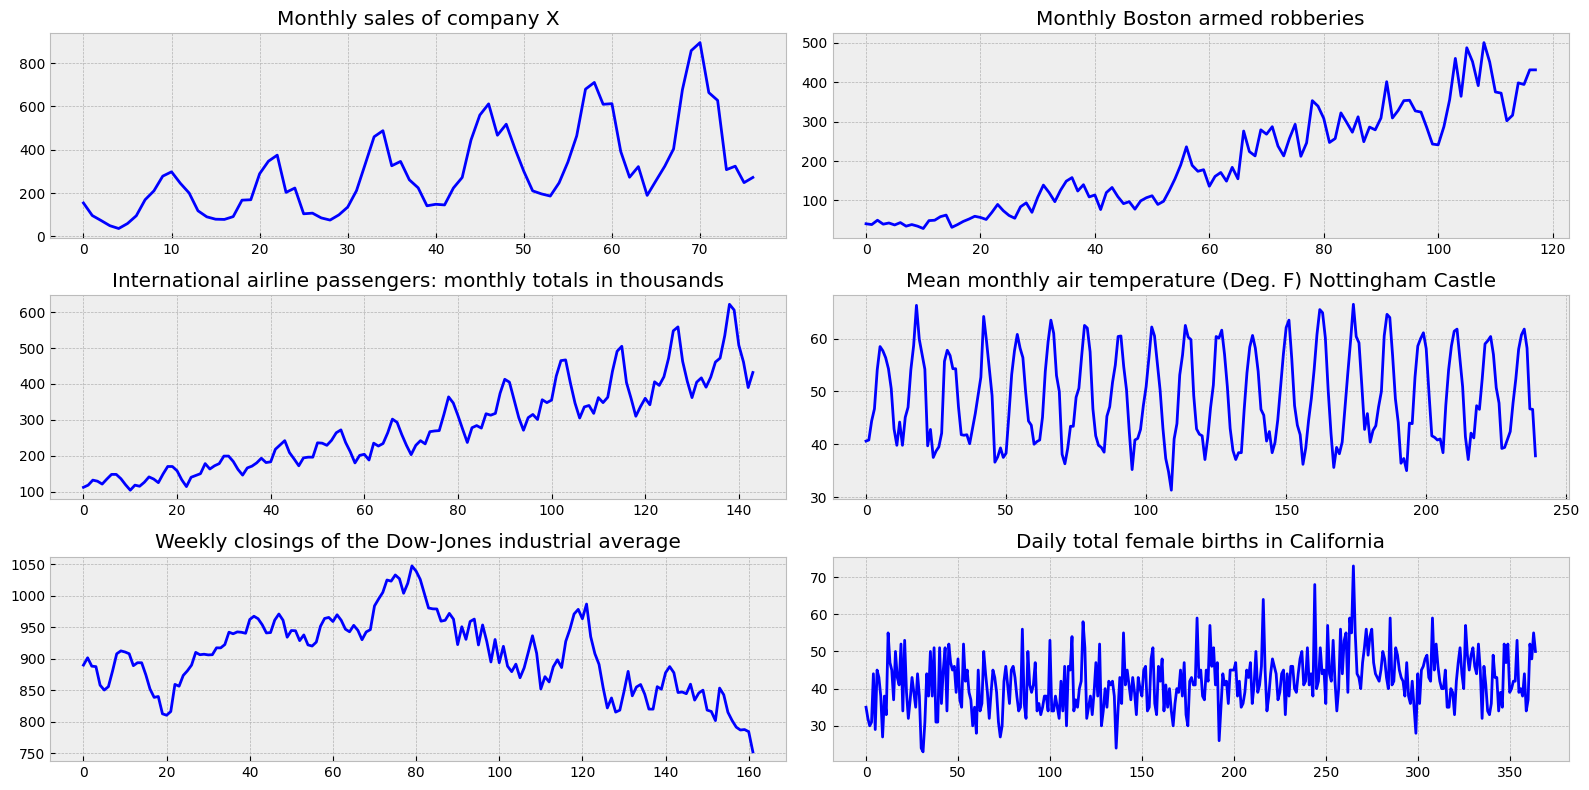

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [14]:
#Проверим стационарность временных рядов через критерий Дикки-Фуллера
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)
    print()

print("Results of Dickey-Fuller Test  for ","Monthly sales of company X")
test_stationarity(all_series["Monthly sales of company X"])

print("Results of Dickey-Fuller Test  for ","Monthly Boston armed robberies")
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

print("Results of Dickey-Fuller Test  for ","International airline passengers: monthly totals in thousands")
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

print("Results of Dickey-Fuller Test  for ","Mean monthly air temperature (Deg. F) Nottingham Castle")
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

print("Results of Dickey-Fuller Test  for","Weekly closings of the Dow-Jones industrial average")
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

print("Results of Dickey-Fuller Test  for ","Daily total female births in California")
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test  for  Monthly sales of company X
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

Results of Dickey-Fuller Test  for  Monthly Boston armed robberies
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

Results of Dickey-Fuller Test  for  International airline passengers: monthly totals in thousands
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

Results of Dickey-Fuller Test  for  Mean monthly air temperature (Deg. F) Nottingham Castle
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number

In [ ]:
#Временные ряды №4 (Mean monthly air temperature (Deg. F) Nottingham Castle)  и  №6 (Daily total female births in California)
#уже являются стационарными, так как p-value критерия Dickey-Fuller для них < 0.05 (в этом случае Критерий Дики-Фуллера отвергает нулевую гипотезу о нестационарности)
#осталось привести к стационарному виду временные ряды № 1,2,3,5

In [19]:
#нормализуем дисперсию и диференцуем временные ряды № 1,2,3,5
from scipy.stats import boxcox
import numpy as np

In [20]:
series_1 = boxcox(all_series["Monthly sales of company X"], 0)
series_1d = np.diff(series_1, 1)
series_2 = boxcox(all_series["Monthly Boston armed robberies"], 0)
series_2d = np.diff(series_2, 1)
series_3 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
series_3d = np.diff(series_3, 1)
series_5 = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)
series_5d = np.diff(series_5, 1)

In [22]:
print("Time series 1")
test_stationarity(series_1d)
print("Time series 2")
test_stationarity(series_2d)
print("Time series 3")
test_stationarity(series_3d)
print("Time series 5")
test_stationarity(series_5d)

Time series 1
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
dtype: float64

Time series 2
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
dtype: float64

Time series 3
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
dtype: float64

Time series 5
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
dtype: float64



In [ ]:
#Привели к стационарным следующие временные ряды: 1, 2,5 остался временной ряд №3 (International airline passengers: monthly totals in thousands)

In [27]:
#Построим график  и коррелограммы временного ряда №3


In [24]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [25]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

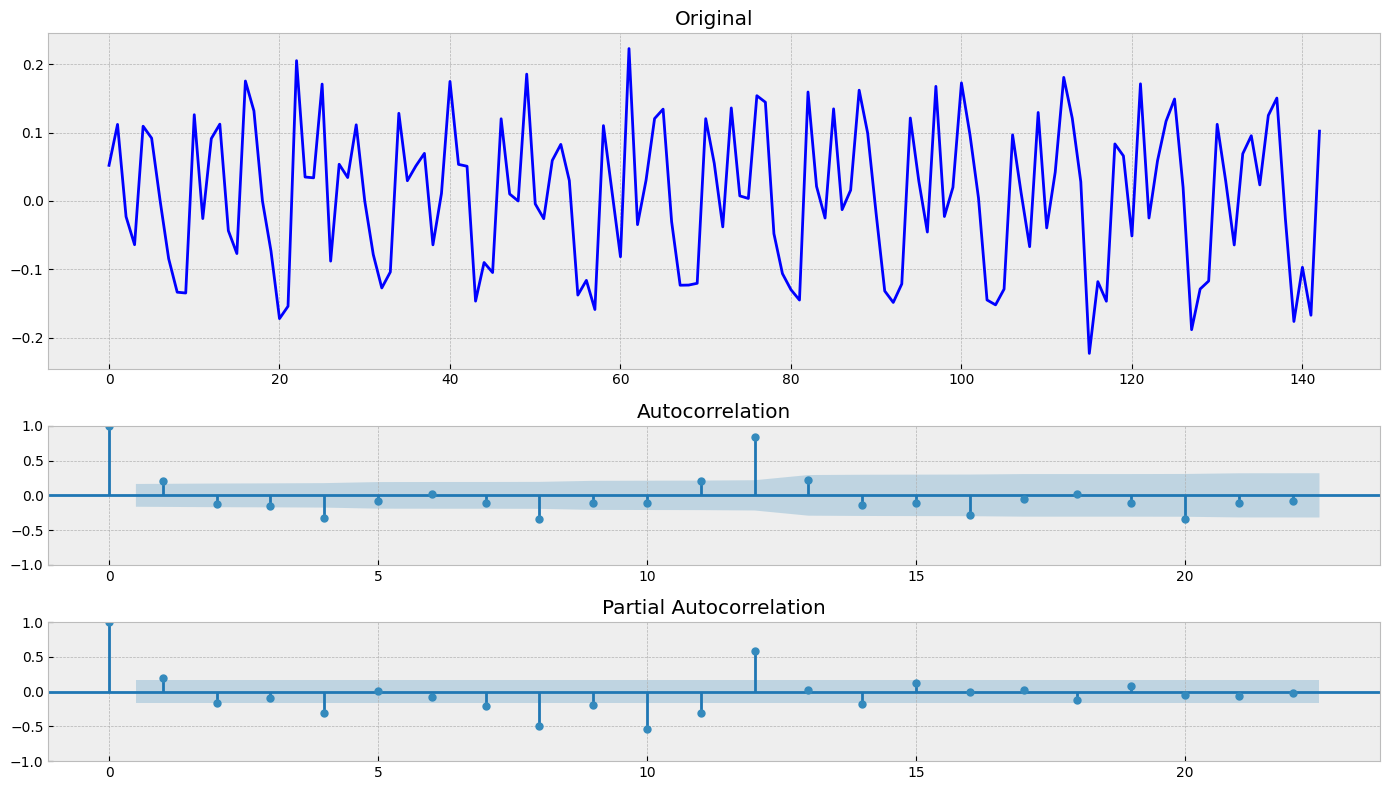

In [26]:
tsplot(series_3d)